In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | mys shmidta
City not found. Skipping...
Processing Record 2 of Set 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 13 | medina
Processing Record 4 of Set 13 | atuona
Processing Record 5 of Set 13 | orapa
Processing Record 6 of Set 13 | albany
Processing Record 7 of Set 13 | zhigalovo
Processing Record 8 of Set 13 | junction city
Processing Record 9 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 13 | puerto ayora
Processing Record 11 of Set 13 | castro
Processing Record 12 of Set 13 | karaul
City not found. Skipping...
Processing Record 13 of Set 13 | yellowknife
Processing Record 14 of Set 13 | provideniya
Processing Record 15 of Set 13 | punta arenas
Processing Record 16 of Set 13 | rikitea
Processing Record 17 of Set 13 | bhainsa
Processing Record 18 of Set 13 | nidzica
Processing Record 19 of Set 13 | san patricio
Processing Record 2

Processing Record 33 of Set 16 | itarema
Processing Record 34 of Set 16 | bambous virieux
Processing Record 35 of Set 16 | kichmengskiy gorodok
Processing Record 36 of Set 16 | acajutla
Processing Record 37 of Set 16 | qandala
Processing Record 38 of Set 16 | umzimvubu
City not found. Skipping...
Processing Record 39 of Set 16 | esperance
Processing Record 40 of Set 16 | alofi
Processing Record 41 of Set 16 | grindavik
Processing Record 42 of Set 16 | saint-augustin
Processing Record 43 of Set 16 | tautira
Processing Record 44 of Set 16 | katsuura
Processing Record 45 of Set 16 | nueva loja
Processing Record 46 of Set 16 | lavrentiya
Processing Record 47 of Set 16 | najran
Processing Record 48 of Set 16 | sur
Processing Record 49 of Set 16 | kisangani
Processing Record 50 of Set 16 | dingle
Processing Record 1 of Set 17 | black river
Processing Record 2 of Set 17 | rungata
City not found. Skipping...
Processing Record 3 of Set 17 | luderitz
Processing Record 4 of Set 17 | amazar
Proces

Processing Record 19 of Set 20 | taltal
Processing Record 20 of Set 20 | vanavara
Processing Record 21 of Set 20 | morlaix
Processing Record 22 of Set 20 | benguela
Processing Record 23 of Set 20 | marienburg
Processing Record 24 of Set 20 | tilichiki
Processing Record 25 of Set 20 | gebre guracha
Processing Record 26 of Set 20 | ziro
Processing Record 27 of Set 20 | batemans bay
Processing Record 28 of Set 20 | rocky mountain house
Processing Record 29 of Set 20 | san juan de colon
Processing Record 30 of Set 20 | stoyba
City not found. Skipping...
Processing Record 31 of Set 20 | reefton
City not found. Skipping...
Processing Record 32 of Set 20 | manthani
Processing Record 33 of Set 20 | port hardy
Processing Record 34 of Set 20 | kenai
Processing Record 35 of Set 20 | kawalu
Processing Record 36 of Set 20 | rutland
Processing Record 37 of Set 20 | sambava
Processing Record 38 of Set 20 | tromso
Processing Record 39 of Set 20 | kuhdasht
Processing Record 40 of Set 20 | riyadh
Proces

Processing Record 2 of Set 24 | roma
Processing Record 3 of Set 24 | makakilo city
Processing Record 4 of Set 24 | jatai
Processing Record 5 of Set 24 | ostrovnoy
Processing Record 6 of Set 24 | butte
Processing Record 7 of Set 24 | asfi
Processing Record 8 of Set 24 | marcona
City not found. Skipping...
Processing Record 9 of Set 24 | bulgan
Processing Record 10 of Set 24 | casambalangan
Processing Record 11 of Set 24 | tulun
Processing Record 12 of Set 24 | costa rica
Processing Record 13 of Set 24 | san giovanni in fiore
Processing Record 14 of Set 24 | mildura
Processing Record 15 of Set 24 | vadso
Processing Record 16 of Set 24 | nguiu
City not found. Skipping...
Processing Record 17 of Set 24 | mazamari
Processing Record 18 of Set 24 | chesma
Processing Record 19 of Set 24 | sioux lookout
Processing Record 20 of Set 24 | auki
Processing Record 21 of Set 24 | woodend
Processing Record 22 of Set 24 | port hawkesbury
Processing Record 23 of Set 24 | tidore
City not found. Skipping..

In [7]:
len(city_data)

551

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Medina,24.4686,39.6142,84.63,8,0,4.61,SA,2022-05-16 02:57:25
1,Atuona,-9.8000,-139.0333,78.76,71,11,15.84,PF,2022-05-16 02:57:25
2,Orapa,-21.2833,25.3667,60.94,77,4,14.05,BW,2022-05-16 02:57:26
3,Albany,42.6001,-73.9662,66.02,94,100,3.40,US,2022-05-16 02:53:56
4,Zhigalovo,54.8097,105.1578,69.21,35,95,3.13,RU,2022-05-16 02:53:16
5,Junction City,39.0286,-96.8314,64.85,69,33,9.19,US,2022-05-16 02:57:27
6,Puerto Ayora,-0.7393,-90.3518,73.54,97,80,1.01,EC,2022-05-16 02:57:28
7,Castro,-24.7911,-50.0119,51.67,98,11,3.87,BR,2022-05-16 02:57:28
8,Yellowknife,62.4560,-114.3525,52.32,43,75,9.22,CA,2022-05-16 02:57:29
9,Provideniya,64.3833,-173.3000,39.36,70,0,15.99,RU,2022-05-16 02:57:30


In [9]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [10]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Medina,SA,2022-05-16 02:57:25,24.4686,39.6142,84.63,8,0,4.61
1,Atuona,PF,2022-05-16 02:57:25,-9.8000,-139.0333,78.76,71,11,15.84
2,Orapa,BW,2022-05-16 02:57:26,-21.2833,25.3667,60.94,77,4,14.05
3,Albany,US,2022-05-16 02:53:56,42.6001,-73.9662,66.02,94,100,3.40
4,Zhigalovo,RU,2022-05-16 02:53:16,54.8097,105.1578,69.21,35,95,3.13
5,Junction City,US,2022-05-16 02:57:27,39.0286,-96.8314,64.85,69,33,9.19
6,Puerto Ayora,EC,2022-05-16 02:57:28,-0.7393,-90.3518,73.54,97,80,1.01
7,Castro,BR,2022-05-16 02:57:28,-24.7911,-50.0119,51.67,98,11,3.87
8,Yellowknife,CA,2022-05-16 02:57:29,62.4560,-114.3525,52.32,43,75,9.22
9,Provideniya,RU,2022-05-16 02:57:30,64.3833,-173.3000,39.36,70,0,15.99


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1652670874.6819525

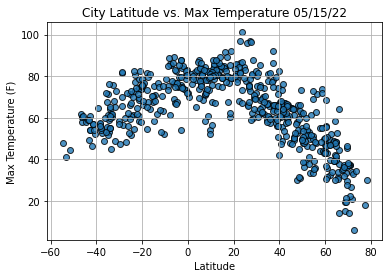

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

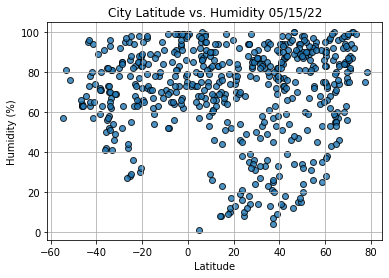

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

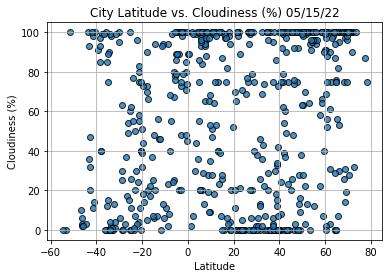

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

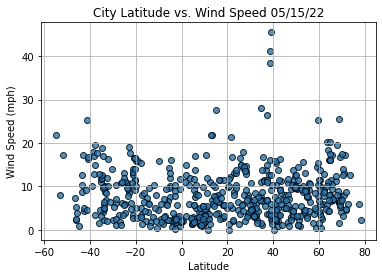

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

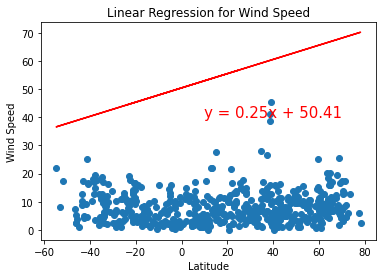

In [32]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
# Perform linear regression.
    (slope, intercept, r_value, p_value, std_err) = linregress(lats, wind_speed)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = lats * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(lats,wind_speed)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title("Linear Regression for Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

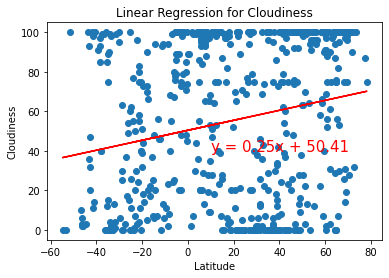

In [33]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, cloudiness)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = lats * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(lats,cloudiness)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title("Linear Regression for Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

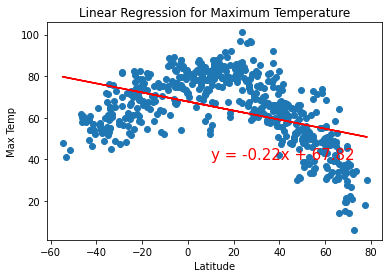

In [34]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, max_temps)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = lats * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(lats,max_temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title("Linear Regression for Maximum Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

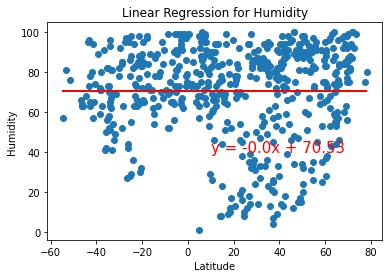

In [35]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, humidity)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = lats * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(lats,humidity)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title("Linear Regression for Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

In [36]:
index13 = city_data_df.loc[13]
index13

City                      Nidzica
Country                        PL
Date          2022-05-16 02:57:32
Lat                       53.3605
Lng                       20.4275
Max Temp                    33.39
Humidity                       86
Cloudiness                     94
Wind Speed                   4.07
Name: 13, dtype: object

In [37]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Medina,SA,2022-05-16 02:57:25,24.4686,39.6142,84.63,8,0,4.61
3,Albany,US,2022-05-16 02:53:56,42.6001,-73.9662,66.02,94,100,3.40
4,Zhigalovo,RU,2022-05-16 02:53:16,54.8097,105.1578,69.21,35,95,3.13
5,Junction City,US,2022-05-16 02:57:27,39.0286,-96.8314,64.85,69,33,9.19
8,Yellowknife,CA,2022-05-16 02:57:29,62.4560,-114.3525,52.32,43,75,9.22


In [50]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Atuona,PF,2022-05-16 02:57:25,-9.8000,-139.0333,78.76,71,11,15.84
2,Orapa,BW,2022-05-16 02:57:26,-21.2833,25.3667,60.94,77,4,14.05
6,Puerto Ayora,EC,2022-05-16 02:57:28,-0.7393,-90.3518,73.54,97,80,1.01
7,Castro,BR,2022-05-16 02:57:28,-24.7911,-50.0119,51.67,98,11,3.87
10,Punta Arenas,CL,2022-05-16 02:57:31,-53.1500,-70.9167,41.11,81,0,8.05


In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,15))

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Medina,SA,2022-05-16 02:57:25,24.4686,39.6142,84.63,8,0,4.61
1,1,Atuona,PF,2022-05-16 02:57:25,-9.8000,-139.0333,78.76,71,11,15.84
2,2,Orapa,BW,2022-05-16 02:57:26,-21.2833,25.3667,60.94,77,4,14.05
3,3,Albany,US,2022-05-16 02:53:56,42.6001,-73.9662,66.02,94,100,3.40
4,4,Zhigalovo,RU,2022-05-16 02:53:16,54.8097,105.1578,69.21,35,95,3.13


City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

Figure(layout=FigureLayout(height='420px'))

Figure(layout=FigureLayout(height='420px'))

Figure(layout=FigureLayout(height='420px'))

Figure(layout=FigureLayout(height='420px'))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Medina,SA,2022-05-16 02:57:25,24.4686,39.6142,84.63,8,0,4.61
1,1,Atuona,PF,2022-05-16 02:57:25,-9.8000,-139.0333,78.76,71,11,15.84
11,11,Rikitea,PF,2022-05-16 02:57:31,-23.1203,-134.9692,77.41,68,50,19.08
14,14,San Patricio,US,2022-05-16 02:52:37,28.0170,-97.5169,80.55,82,0,13.53
17,17,Meadow Lake,US,2022-05-16 02:57:34,34.8014,-106.5436,81.14,23,29,7.63
18,18,Gunjur,GM,2022-05-16 02:57:35,13.2019,-16.7339,75.27,94,75,6.91
19,19,Avarua,CK,2022-05-16 02:55:53,-21.2078,-159.7750,78.85,65,75,3.44
26,26,Shenandoah,US,2022-05-16 02:54:10,30.4013,-91.0009,79.99,86,38,6.58
28,28,Buchanan,LR,2022-05-16 02:57:39,5.8808,-10.0467,78.98,88,100,7.47
31,31,Kumta,IN,2022-05-16 02:57:41,14.4167,74.4000,84.40,78,100,9.93


City_ID       156
City          156
Country       156
Date          156
Lat           156
Lng           156
Max Temp      156
Humidity      156
Cloudiness    156
Wind Speed    156
dtype: int64

,City,Country,Max Temp,Lat,Lng,Hotel Name
0,Medina,SA,84.63,24.4686,39.6142,
1,Atuona,PF,78.76,-9.8000,-139.0333,
11,Rikitea,PF,77.41,-23.1203,-134.9692,
14,San Patricio,US,80.55,28.0170,-97.5169,
17,Meadow Lake,US,81.14,34.8014,-106.5436,
18,Gunjur,GM,75.27,13.2019,-16.7339,
19,Avarua,CK,78.85,-21.2078,-159.7750,
26,Shenandoah,US,79.99,30.4013,-91.0009,
28,Buchanan,LR,78.98,5.8808,-10.0467,
31,Kumta,IN,84.40,14.4167,74.4000,
